# Data Selection #

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# ---------------------------------------------------------
# 1. Load + basic cuts
# ---------------------------------------------------------
df = pd.read_csv("ZTF_snia_DESI_fastspec_hostprops_with_residuals.csv")
df = df[(df["lccoverage_flag"] == 1) & (df["fitquality_flag"] == 1)]

# g - r color
df["SDSS_g_minus_r"] = df["ABSMAG01_SDSS_G"] - df["ABSMAG01_SDSS_R"]

In [11]:
# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    "LOGMSTAR",
    "SFR",
    "AGE",
    "DN4000",
    "VDISP",
    "SDSS_g_minus_r",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train/test split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

# ---------------------------------------------------------
# 4. Train Random Forest on TRAINING DATA ONLY
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=500,
    max_depth=200,
    random_state=42
)

regr.fit(X, y)

# ---------------------------------------------------------
# 5. Predict ONLY on the TEST SET
# ---------------------------------------------------------
y_pred = regr.predict(X)

print(y_pred)

[-1.58783688e-02  2.57582654e-02  2.66408157e-02  1.56568869e-01
 -6.28597417e-02 -1.55289195e-01 -1.15214837e-01  1.17838245e-01
 -3.50947722e-02 -4.18198804e-01 -1.99295292e-01 -2.37895725e-01
  6.69645734e-02 -1.39270666e-01  2.86638093e-01 -1.15802223e-01
 -3.67371356e-01  3.18798330e-01 -4.26476103e-02 -1.15751036e-01
 -9.04969603e-02  5.52082581e-02  4.61534839e-02  1.14112938e-01
  1.34576850e-01  5.83104440e-02  9.62800599e-02  1.20420051e-01
  1.55422690e-01  6.25899346e-02 -4.81291287e-02 -1.96978668e-02
  6.96911703e-03  1.35783420e-01  1.97891445e-03 -3.17476687e-03
 -6.04906440e-02 -1.78430909e-01  4.09147951e-02 -1.16853007e-01
 -1.00232939e-01 -6.79812614e-02 -1.74470641e-01 -1.77579664e-01
 -7.59591142e-02 -2.55234912e-02  7.10534817e-02 -1.05417844e-03
 -1.80830746e-01  1.46145572e-02 -2.03540877e-01  4.08729933e-02
 -7.61620038e-02 -9.61363661e-02 -1.74091974e-03 -1.00341891e-01
  1.44519162e-01  3.15737595e-02  2.10956576e-01 -4.30270049e-02
  1.08527545e-01 -1.10935

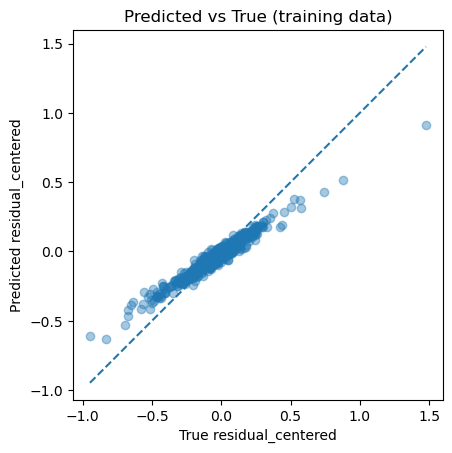

In [10]:

plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--")  # 1:1 line
plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (training data)")
plt.gca().set_aspect("equal", "box")
plt.show()